In [1]:
import numpy as np
import scipy.linalg as la
import hamiltonian as hm
%matplotlib inline
import matplotlib.pyplot as plt

In [75]:
L     = 7
vs    = np.asarray([1,2,3,4,5])
sites = np.arange(L)

In [76]:
times = []
for v in vs: times.extend(sites/v)

In [77]:
times = list(dict.fromkeys(times))
times.sort()
print(times)

[0.0, 0.20000000000000001, 0.25, 0.33333333333333331, 0.40000000000000002, 0.5, 0.59999999999999998, 0.66666666666666663, 0.75, 0.80000000000000004, 1.0, 1.2, 1.25, 1.3333333333333333, 1.5, 1.6666666666666667, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0]


In [101]:
sites_at_ts_fore = []
sites_at_ts_back = []
for time in times:
    sites_at_t_fore = []
    sites_at_t_back = []
    for v in vs: 
        dist = (int) (np.round(time*v))
        site_fore = dist
        site_back = L-dist-1
        if np.isclose((time*v), dist) and (site_fore < L) and not site_fore in sites_at_t_fore: 
            sites_at_t_fore.append(site_fore)
        if np.isclose((time*v), dist) and (site_back >-1) and not site_back in sites_at_t_back: 
            sites_at_t_back.append(site_back)
    sites_at_ts_fore.append(sites_at_t_fore)
    sites_at_ts_back.append(sites_at_t_back)

In [102]:
for idx, val in enumerate(times):
    print(val, sites_at_ts_fore[idx], sites_at_ts_back[idx])

0.0 [0] [6]
0.2 [1] [5]
0.25 [1] [5]
0.333333333333 [1] [5]
0.4 [2] [4]
0.5 [1, 2] [5, 4]
0.6 [3] [3]
0.666666666667 [2] [4]
0.75 [3] [3]
0.8 [4] [2]
1.0 [1, 2, 3, 4, 5] [5, 4, 3, 2, 1]
1.2 [6] [0]
1.25 [5] [1]
1.33333333333 [4] [2]
1.5 [3, 6] [3, 0]
1.66666666667 [5] [1]
2.0 [2, 4, 6] [4, 2, 0]
2.5 [5] [1]
3.0 [3, 6] [3, 0]
4.0 [4] [2]
5.0 [5] [1]
6.0 [6] [0]


In [81]:
H = hm.dense_H(L)
vals, vecs = la.eigh(H)

In [103]:
weightsfore = []
weightsback = []

for idx, t in enumerate(times):
    (fore, _) = hm.get_weights(L, t, sites_at_ts_fore[idx], vecs=vecs, vals=vals)
    (_, back) = hm.get_weights(L, t, sites_at_ts_back[idx], vecs=vecs, vals=vals)
    weightsfore.append(fore)
    weightsback.append(back)

In [104]:
for idx, val in enumerate(times):
    print(val, weightsfore[idx], weightsback[idx])

0.0 [ 1.] [ 1.]
0.2 [ 0.1989642] [ 0.20041693]
0.25 [ 0.28409186] [ 0.2881894]
0.333333333333 [ 0.41771122] [ 0.43211492]
0.4 [ 0.54660225] [ 0.48566434]
0.5 [ 0.5766973   0.66275859] [ 0.63811899  0.54561699]
0.6 [ 0.46700762] [ 0.45766122]
0.666666666667 [ 0.72970939] [ 0.55625008]
0.75 [ 0.56985321] [ 0.56512295]
0.8 [ 0.57031163] [ 0.45071834]
1.0 [ 0.61453192  0.65977902  0.56771348  0.52472787  0.58266933] [ 0.67428192  0.54206662  0.51583487  0.52525261  0.57259448]
1.2 [ 0.62146868] [ 0.41191592]
1.25 [ 0.34507841] [ 0.58509811]
1.33333333333 [ 0.43548258] [ 0.43684089]
1.5 [ 0.55904589  0.58648597] [ 0.41831093  0.46241062]
1.66666666667 [ 0.3604015] [ 0.61667127]
2.0 [ 0.61467803  0.57256174  0.56923247] [ 0.64905962  0.43133111  0.44653819]
2.5 [ 0.53864794] [ 0.56135396]
3.0 [ 0.5815329   0.45433121] [ 0.5454987   0.45542341]
4.0 [ 0.51104834] [ 0.54069936]
5.0 [ 0.57028546] [ 0.61729663]
6.0 [ 0.60928281] [ 0.43930316]


In [108]:
otocsfore = np.zeros((len(vs), L))
otocsback = np.zeros((len(vs), L))
for v in vs:
    for site in range(L):
        t_need = site/v
        for i, t in enumerate(times):
            if np.isclose(t,t_need): break
        j = (sites_at_ts_fore[i]).index(site)
#         print(v, site, sites_at_ts[i][j], t_need, times[i])
        otocsfore[v-1, site] = weightsfore[i][j]
for v in vs:
    for dist in range(L):
        site = L-dist-1
        t_need = dist/v
        for i, t in enumerate(times):
            if np.isclose(t,t_need): break
        j = (sites_at_ts_back[i]).index(site)
#         print(v, site, sites_at_ts[i][j], t_need, times[i])
        otocsback[v-1, site] = weightsback[i][j]

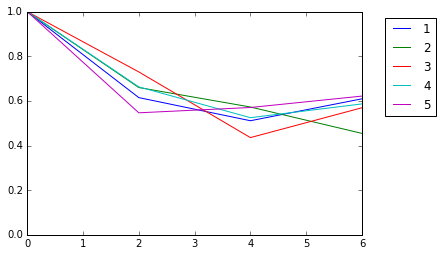

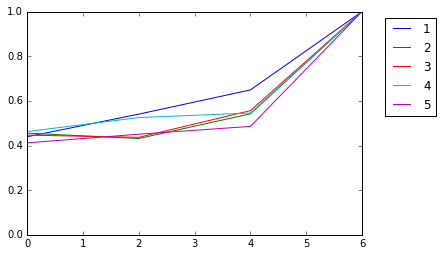

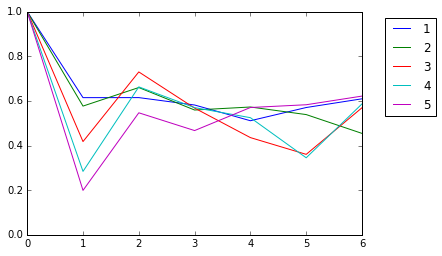

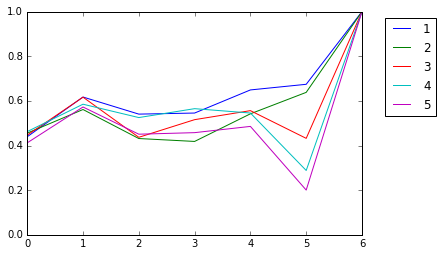

In [111]:
for idx, otocfore in enumerate(otocsfore):
    plt.plot(sites[::2], otocfore[::2], label = str(vs[idx]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

for idx, otocback in enumerate(otocsback):
    plt.plot(sites[::2], otocback[::2], label = str(vs[idx]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

for idx, otocfore in enumerate(otocsfore):
    plt.plot(sites, otocfore, label = str(vs[idx]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

for idx, otocback in enumerate(otocsback):
    plt.plot(sites, otocback, label = str(vs[idx]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()